<a href="https://colab.research.google.com/github/carvalhopinheiro/Ciencia-de-Dados/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  ### **1ª Projeto Airbnb**

*by [Paulo Victor](https://www.linkedin.com/in/carvalhopinheiro/)*

---
# Análise dos Dados do Airbnb - *Província de Tokyo, Japan Região de Kantō*

<center><img alt="Analisando Airbnb" width="30%" src="https://marcas-logos.net/wp-content/uploads/2020/03/Airbnb-logo.jpg"></center>

  O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. E ela **não possui nenhum hotel**, uma pratica em que usa-se a Sharing economy (Economia Compartilhada) atrelada a tecnologia para a solução de problemas a baixo custo.

  Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

  Em outubro de 2021, a Startup fundada 14 anos atrás, já havia **hospedado mais de 1 Bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

  Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Tokyo" width="70%" src="https://wallpaperaccess.com/full/19066.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Overview - Tokyo

Tokyo, a movimentada capital do Japão, combina o estilo ultramoderno com o tradicional, desde arranha-céus iluminados por neon a templos históricos. O opulento santuário xintoísta Meiji é conhecido por seu altíssimo portão e pelas florestas circundantes.

Uma cidade grande, espalhada e provavelmente muito diferente de tudo que você já viu na vida. Praticamente todos aqueles clichês das fotos são verdade: sempre muita gente nas ruas, pessoas com roupas diferentes, filas, placas piscando pra todos os lados, edifícios altos, cruzamentos movimentados, transporte mega eficiente e uma cumplicidade entre o desenvolvimento da cidade moderna e o respeito às tradições.

**Dicas:**

Visitar os principais bairros de Tokyo são passeios que consideramos imperdíveis! Shinjuku, Shibuya, Harajuku, Akihabara, Ginza e Asakusa são lugares para colocar na listinha. Não deixe de atravessar o cruzamento de Shibuya (o mais movimentado do mundo) e visitar a Starbucks dali para acompanhar de um ponto panorâmico a multidão atravessando as ruas. Próximo do cruzamento, fica a estátua do Hachiko, um cachorro cuja história ganhou até um filme! Andar pela estação de Shinjuku, que tem mais de 200 saídas, também é algo imperdível, assim como fazer compras nos arredores da estação. Quando estiver no bairro, você pode subir até os observatórios do Metropolitan Government Building, que são gratuitos e oferecem uma boa vista.

## Obtenção dos Dados


Para realizar a obtenção dos dados vamos importar as bibliotecas necessarias para a analise de dados e geração de dados.

Importaremos as biliotecas mais famosas para essa aárea de analise e visualização de dados 

* [Pandas](https://pandas.pydata.org/docs/)
* [Matplotlib](https://matplotlib.org/stable/)
* [Seaborn](https://seaborn.pydata.org/index.html)
* [PyWaffle](https://waffle.readthedocs.io/en/stable/#)
* [Folium](http://python-visualization.github.io/folium/)
* [Wordcloud](https://amueller.github.io/word_cloud/)

Todos os dados obtidos foram fornecidos pelo proprio site do [Airbnb](http://insideairbnb.com/get-the-data.html)




In [57]:
!pip install pywaffle -q

In [58]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import folium
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [59]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-10-28/visualisations/listings.csv')

## Análise dos Dados


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.



In [60]:
# 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,11000,3,165,2019-11-14,1.49,1,363,0,M130003350
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7950,3,228,2020-01-18,2.31,1,245,0,M130000243
2,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,0.97,1,88,0,M130007760
3,1249571,Unique stay! New&1min to the subway,6809418,Yume,NaN,Shibuya Ku,35.65111,139.72165,Entire home/apt,32571,4,102,2019-11-30,1.46,1,320,1,M130000957
4,1298200,Pine House 2 Bed Room + 2 Toilets,6606987,K & N,NaN,Katsushika Ku,35.73850,139.85167,Entire home/apt,11286,4,339,2020-03-13,3.72,2,183,0,M130009943


Após a visualização do nosso dataset, notamos que o presente arquivo possui 10414 linhas e 18 colunas, nas quais suas colunas de variaveis constam-se na língua inglesa, logo vamos fazer um breve explição de cada varaivel para melhor entendimento.

**Dicionário das variáveis**

* `id` - Número de ID do imovel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de ID do proprietario
* `host_name` - Nome do proprietario
* `neighbourhood_group` - Coluna ausente de valor válido
* `neighbourhood` - Nome do Distrito
* `latitude	` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da latitude da propriedade
* `room_type` - Tipo de quarto 
* `price` - Preço do aluguel 
* `minimum_nights` - Minimo de Noites para reserva
* `number_of_reviews` - Numero de feedbacks da propriedade
* `last_review` - Data do ultimo feedback 
* `reviews_per_month` - Número de feedback por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietario
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias




### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [61]:
# identificar o volume de dados do DataFrame
print(df.shape)

# verificar as 5 primeiras entradas do dataset
df.dtypes

(10414, 18)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Podemos ver que o nosso dataframe possui 10414 linhas e 18 colunas, sendo elas divididos entre `object` que são palavras, `int` e `float` os quais são  numeros inteiros e decimais respectivamente 

Nota-se que nenhum valor possui são dados errados.

Exemplo - Valor que deveria ser numerico está como palavra.

Logo se faz bastante importante essa visualização, pois apartir dela poderemos tratar esses valores caso esteja incorreto.

### **Qual a porcentagem de valores ausentes no *dataset*?**

Vamos analisar a quantidade de valores ausentes, para podemos trata-los, podendo ser realizado de duas formas:
* Excluindo seus valores, caso não atrapalhe a analise do todo.
* Inserindo valores medios, como Média ou Mediana nos valores ausentes. 


In [62]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  20.338007
last_review                        20.338007
license                             0.316881
host_name                           0.268869
longitude                           0.000000
name                                0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64


Optamos pelo método de exclusão dos valores, já que todos os valores de `neighbourhood_group` estão ausentes e 20% de `reviews_per_month ` e `last_review ` também estão ausentes e nenhum deles possui informações relevantes para a análise iremos excluir suas colunas.

Em relação as outras entradas ausentes (license e host_name), como representam menos de 0,35% (Valor considerado mínimo em relação ao todo) iremos excluir suas linhas.

In [63]:
df = df.drop(columns=['neighbourhood_group','reviews_per_month','last_review'])
df = df.dropna(axis=0)

Após a exclusão iremos checar quantos valores foram excluidos e se estão de acordo com o objetivo.


In [64]:
print(df.shape)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

(10353, 15)


license                           0.0
number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

Vemos que a exclusão das linhas e colunas com valores nulos levaram a uma redução no dataset de 10.414 linhas para 10.353 e uma redução de 18 para 15 colunas.

Vemos tambem que após a exclusão não sobrou nenhum valor ausente no nosso dateset, logo o objetivo desse primeiro tratamento foi um sucesso , pois isso nos permite aprofundamos a análise, observando a quantidade de outliers.

### **Qual o tipo de distribuição das variáveis?** 

Para observamos de forma visual todas as variáveis numéricas iremos plotar gráficos de histogramas, na qual são bastante úteis, pois mostram a quantidade de algo por periodo de distribuição.

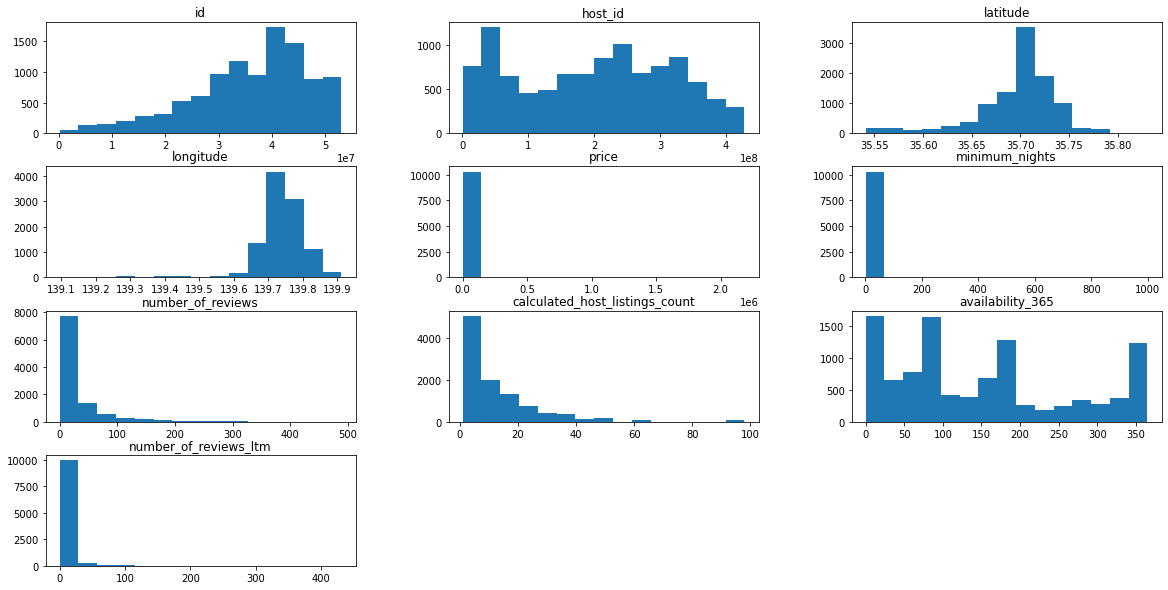

In [65]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10), grid=False);

Analisando os histogramas focando em outliers vemos alguns valores que distocem bastante de uma realidade como é o caso de `minimum_nights` e `price` que possuem como valores maximos 1000 noites mínimas para aluguel e 2 Milhões de ienes por díaria 

Logo, vamos analisar esses duas colunas mais afundo.

# Há Outliers presentes ?

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

É muito importante conseguir identificar e tratar esses outliers, pois eles podem nos mostrar uma imagem incorreta dos nossos dados.

In [66]:
print(df[['minimum_nights', 'price']].describe().round(2))

       minimum_nights       price
count        10353.00    10353.00
mean             3.83    13515.10
std             25.54    46801.06
min              1.00      825.00
25%              1.00     4498.00
50%              1.00     7300.00
75%              2.00    12857.00
max            999.00  2185000.00


Como visto nos gráficos anterioes essas duas variaveis (colunas) possuem valores bem distoantes no caso de `minimum_nights ` o seu `std` (Desvio Padrão) esta em 25, vemos tambem que 75% dos dados possuem como no minimo 2 quantidade noite minimas, enquanto o maior encontrado foi 999 noites, número totalmente fora do padrão.

Já na coluna `price` a situção é ainda pior com um `std` (Desvio Padrão) de 46801, enquanto 75% dos seus valores tem no minimo valor de 12857 Ienes por noite o maior valor encontrado é de quase 2,2 Milhões.

# Tratamento de Dados

Como vimos o dataset possui dados que interferem numa análise de dados mais precisa, portanto, iremos usar de métodos estatísticos para cálculos de limites (inferiores e superiores) e assim excluir os dados fora dos limites calculados, melhorando a qualidade dos dados auxiliando na tomada de decisão da maneira mais focada e precisa.

Para a realização dos cálculos dos limites usaremos a regra do IQR Score, método estatísticos bastante usado para tal funcionalidade.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

 #### IQR = Q3 - Q1

Após essa breve essa explicação vamos aos cálculos.

Q1, Q3 e IQR `price` 

In [67]:
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
iqr_price = q3_price - q1_price

Q1,Q3 e IQR `minimum_nights`

In [68]:
q1_minimum_nights = df.minimum_nights.quantile(0.25)
q3_minimum_nights = df.minimum_nights.quantile(0.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

Limites superiores e inferiores de `price` e `minimum_nights`

In [69]:
sup_price = q3_price + 1.5 * iqr_price
inf_price = q1_price - 1.5 * iqr_price
sup_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights


In [70]:
print(f'Limite superior de price {sup_price}')
print(f'limite inferior de price {inf_price}')
print(f'IQR de price {iqr_price}')

Limite superior de price 25395.5
limite inferior de price -8040.5
IQR de price 8359.0


In [71]:
print(f'Limite superior de minimum_nights {sup_minimum_nights}')
print(f'limite inferior de minimum_nights {inf_minimum_nights}')
print(f'IQR de minimum_nights {iqr_minimum_nights}')

Limite superior de minimum_nights 3.5
limite inferior de minimum_nights -0.5
IQR de minimum_nights 1.0


### Graficos box plot de `price` e `minimum_nights`

Com os cálculos realizados vamos gerar gráficos boxplot, para analisar em termos visuais o tanto que os outliers estão atrapalhandp nossa análise.

Também iremos mostrar em valor númerico a quantidade de entradas que estão acima do limite calculado e suas recpectivas porcetagens no dataset.

832 Entradas acima do limite de price
8.04% Entradas acima do limite de price
0 Entradas igual a zero


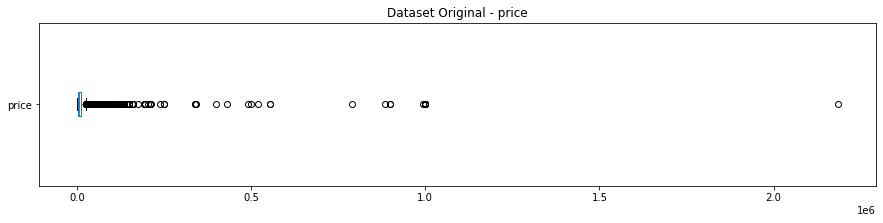

In [72]:
df.price.plot(kind='box', vert=False, figsize=(15,3));
plt.title('Dataset Original - price')
print("{} Entradas acima do limite de price".format(len(df[df.price > sup_price])))
print("{:.2f}% Entradas acima do limite de price".format(len(df[df.price > sup_price]) / df.shape[0] * 100))
print("{} Entradas igual a zero".format(len(df[df.price == 0])))

779 Entradas acima do limite de minimum_nights
7.52% Entradas acima do limite de minimum_nights


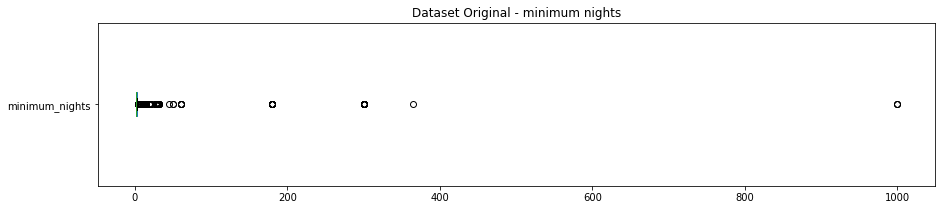

In [73]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.title('Dataset Original - minimum nights')
print("{} Entradas acima do limite de minimum_nights".format(len(df[df.minimum_nights > sup_minimum_nights])))
print("{:.2f}% Entradas acima do limite de minimum_nights".format(len(df[df.minimum_nights > sup_minimum_nights]) / df.shape[0] * 100))

Agora que sabemos a quantidade valores fora dos limites calculados, decidiremos como tratar, a qual possui dois métodos:
* Excluir 
* Trata-los usando Media e Mediana

Como ambos os valores possuem dados em torno de 8%, excluiremos visto que essa quantidade de não afeta negativamente a nossa analise.

### Exclusão dos outliers


In [74]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)
print(f'Quantide de linhas e colunas antes da exclusão {df.shape}')
print(f'Quantidade de linhas e colunas depois da exclusão {df_clean.shape}')

print('A quantide de linhas excluidas foram de 1552')

Quantide de linhas e colunas antes da exclusão (10353, 15)
Quantidade de linhas e colunas depois da exclusão (8801, 15)
A quantide de linhas excluidas foram de 1552


Feita as necessárias exclusões, vamos analisar novamente os valores estatístico das variaveis .

In [75]:
print('{} ANTES {}'.format(15*'-',15*'-'))
print(df[['minimum_nights', 'price']].describe().round(2))
print('{} DEPOIS {}'.format(15*'-',15*'-'))
print(df_clean[['minimum_nights', 'price']].describe().round(2))

--------------- ANTES ---------------
       minimum_nights       price
count        10353.00    10353.00
mean             3.83    13515.10
std             25.54    46801.06
min              1.00      825.00
25%              1.00     4498.00
50%              1.00     7300.00
75%              2.00    12857.00
max            999.00  2185000.00
--------------- DEPOIS ---------------
       minimum_nights     price
count         8801.00   8801.00
mean             1.40   8395.38
std              0.59   5325.81
min              1.00    825.00
25%              1.00   4278.00
50%              1.00   6793.00
75%              2.00  11229.00
max              3.00  25286.00


Vemos que a exclusão de alguns outliers representaram uma diferença enorme na nossa análise.
*  Valores como 2,2 milhões referente ao preço maximo por estadia se tornoram 25 mil
* Valor mais alto do número minimos de noites saiu de 999 para 3 noites

Redução bastante significativa no desvio padrão somente com a exclusão de alguns outliers.

#Analise dos dados

### Novo Histrograma após a exclusão dos outliers

Chegando ao final do tratamento, vamos plotar novamente os histogramas e entender visualmente como esse tratamento dos outliers atingiu as variaveis.

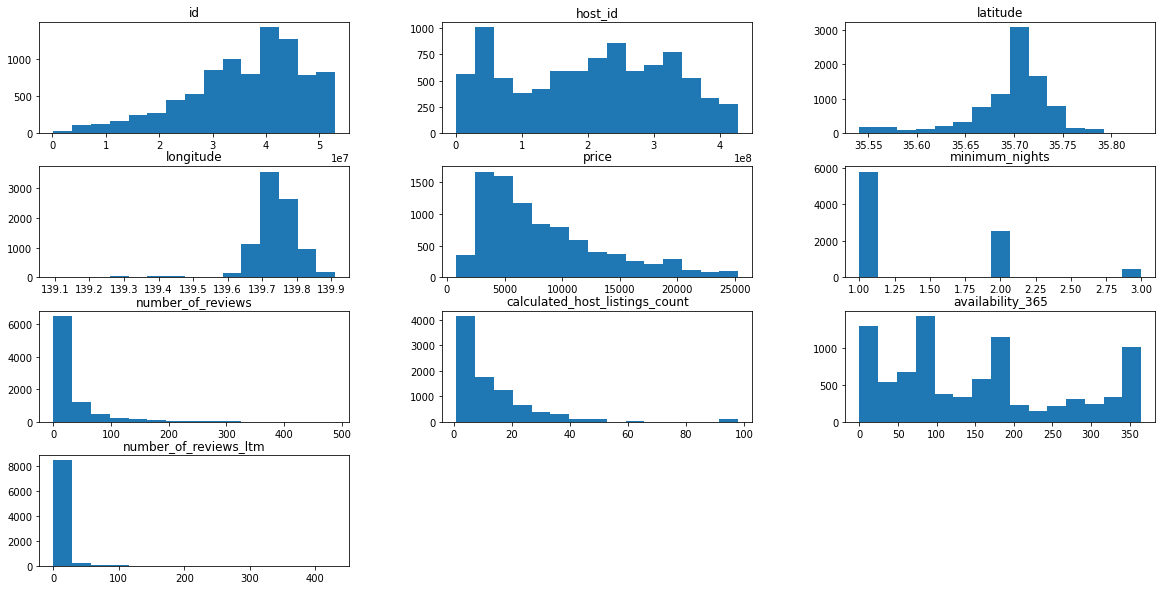

In [76]:
df_clean.hist(bins=15, figsize=(20,10), grid=False);

Após a exclusão vemos que os histogramas do `price` e `minimum_nights` ficaram coerente com a realidade e apresentaram maior facilidade de visualização de seus números.

## **Qual a correlação existente entre as variáveis**

Após o tratamento e visualização dos dados, vamos tentar descobrir se a há alguma correlação entre as variaveis.

A analise da correlação vai apresentar as seguintes variaveis:
* price
* minimum_nights 
* number_of_reviews
* calculated_host_listings_count
* availability_365

In [77]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.060829,-0.004912,0.053002,-0.049234
minimum_nights,-0.060829,1.000000,0.070783,-0.057780,0.068063
number_of_reviews,-0.004912,0.070783,1.000000,-0.154467,0.042362
calculated_host_listings_count,0.053002,-0.057780,-0.154467,1.000000,0.026294
availability_365,-0.049234,0.068063,0.042362,0.026294,1.000000


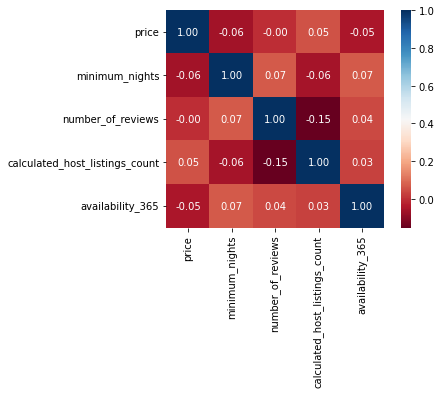

In [78]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Conclusão:

As variaveis númericas analisadas não possuem nenhum grau de causalidade ou correlação, tanto graficamente e númericamente nenhuma variavel apresenta valores significativos, sendo o tom azulado uma correlação muito forte e o tom mais avermlehado o seu inverso.

#Valores da analise de dados

Visto todas as etapas de tramento de dados, vamos a analise exploratoria onde descobriremos os valores medios e suas quantidades

As perguntas respondidas na análise serão:
* Qual a média dos preços de aluguel?
* Qual o tipo de imóvel mais alugado no Airbnb?
* Quantas localidades existem no dataset ?
* Qual a localidade mais cara do dataset ?
* Qual a localidade mais barata do dataset ?
* Quantide de imovel por região das 5 mais caras 
* Qual é a média do mínimo de noites para aluguel ?

Entre outras curiosidades e gráficos na qual valem a pena a obeservação.

## **Qual a média dos preços de aluguel?**

In [79]:
# ver a média da coluna `price``
print('O custo médio por noite em Tokyo é ¥{:.2f}'.format(df_clean.price.mean()))

O custo médio por noite em Tokyo é ¥8395.38


## **Qual o tipo de imóvel mais alugado no Airbnb?**

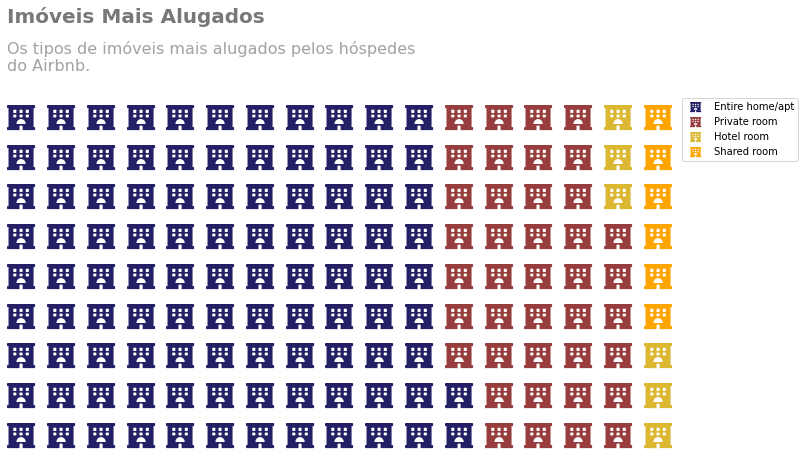

Entire home/apt    0.662425
Private room       0.260198
Hotel room         0.040450
Shared room        0.036928
Name: room_type, dtype: float64


In [80]:
data = dict(df_clean['room_type'].value_counts())

fig = plt.figure(
    FigureClass=Waffle,
    figsize=(12,8),
    rows=9,
    columns=17,
    colors=("#232066", "#983D3D", "#DCB732", "#FFA500"),
    values=data, icons='hotel', icon_size=25,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icon_legend=True
)

plt.text(0, 1.2, 'Imóveis Mais Alugados',
         fontsize=20, 
         color="#787878",
         weight='bold')

plt.text(0, 1.15,
         "Os tipos de imóveis mais alugados pelos hóspedes\n"
         "do Airbnb.",
         verticalalignment="top",
         fontsize=16,
         color="#A2A1A3")

fig.set_tight_layout(False)
plt.show();
print((df_clean['room_type'].value_counts() / df_clean.shape[0]))

**Entire home/apt - Casa inteiro/Apartamento**

**Private room - Quarto Privado**

**Shared room -  Quarto Compartilhado**
 
**Hotel room - Quarto de Hotel**

* Entire home/apt    66.24 %
* Private room       26.01 %
* Hotel room          4.04 %
* Shared room         3.69 %

## **Quantas localidades existem no dataset ?**

In [81]:
df_clean.neighbourhood.value_counts().shape

(48,)

A província do Japão possui 48 Regiões

## **Qual a localidade mais cara do dataset em média ?**



In [82]:
# ver preços por distrito, na média
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).round(2)[:10])

neighbourhood
Mitaka Shi       18840.33
Musashino Shi    10775.00
Chiyoda Ku       10679.09
Shibuya Ku       10071.14
Chuo Ku           9966.63
Minato Ku         9729.33
Ome Shi           9728.50
Taito Ku          9558.83
Suginami Ku       9525.62
Koganei Shi       9443.00
Name: price, dtype: float64


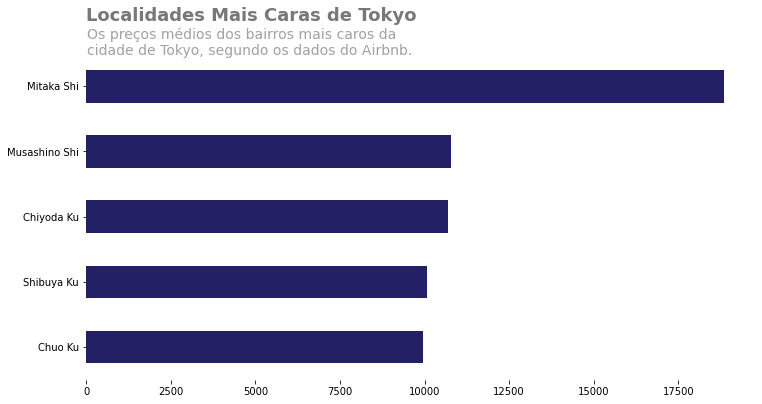

In [83]:
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"
fig, ax = plt.subplots(figsize= (12,6))
ax = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5].plot.barh(color='#232066')
ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('') 

# plotar título
plt.text(0, -1, 'Localidades Mais Caras de Tokyo',
        fontsize=18, 
        color=CINZA3,
        weight='bold')

# plotar subtitulo
plt.text(30, -0.9,
        "Os preços médios dos bairros mais caros da\n"
        "cidade de Tokyo, segundo os dados do Airbnb.",
         verticalalignment="top",
         fontsize=14,
        color=CINZA2)


plt.show()

## **Qual a localidade mais barata do dataset em média ?**

In [84]:
print(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True).round(2)[:10])

neighbourhood
Musashimurayama Shi    3000.00
Hamura Shi             3086.00
Kiyose Shi             3571.00
Hino Shi               3704.47
Akishima Shi           3873.00
Higashikurume Shi      4000.00
Kunitachi Shi          4118.43
Hinohara Mura          5000.00
Fuchu Shi              5094.04
Akiruno Shi            5257.25
Name: price, dtype: float64


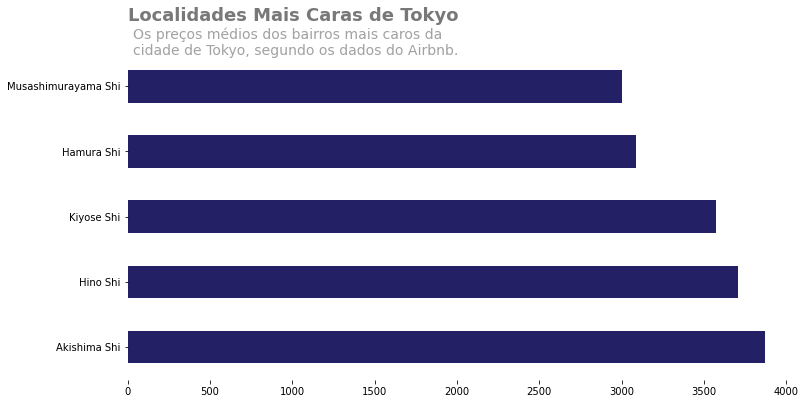

In [85]:
CINZA1, CINZA2, CINZA3= "#CFCDCE", "#A2A1A3", "#787878"
fig, ax = plt.subplots(figsize= (12,6))
ax = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:5].plot.barh(color='#232066')
ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('') 

# plotar título
plt.text(0, -1, 'Localidades Mais Caras de Tokyo',
        fontsize=18, 
        color=CINZA3,
        weight='bold')

# plotar subtitulo
plt.text(30, -0.9,
        "Os preços médios dos bairros mais caros da\n"
        "cidade de Tokyo, segundo os dados do Airbnb.",
         verticalalignment="top",
         fontsize=14,
        color=CINZA2)


plt.show()

## **Quantide de imovel por região (5 mais caras)**


Região de Mitaka Shi


In [86]:
print(df_clean[df_clean.neighbourhood == "Mitaka Shi"].shape)
df_clean[df_clean.neighbourhood == "Mitaka Shi"].price

(3, 15)


69      22857
71      24857
6647     8807
Name: price, dtype: int64

Possui somente 3 imoveis com média de preços em ¥18.840,33

Região de Musashino Shi


In [87]:
print(df_clean[df_clean.neighbourhood == "Musashino Shi"].shape)
df_clean[df_clean.neighbourhood == "Musashino Shi"].price

(4, 15)


1651     3000
2499    10571
8567    17386
8568    12143
Name: price, dtype: int64

Possui somente 4 imoveis com média de preços em ¥10.775,00

Região de Chiyoda Ku

In [88]:
print(df_clean[df_clean.neighbourhood == "Chiyoda Ku"].shape)
df_clean[df_clean.neighbourhood == "Chiyoda Ku"].price.sort_values(ascending=False)

(141, 15)


2618    25136
3084    25136
2583    25136
2619    25136
2584    25136
        ...  
9002     2100
8723     1980
8724     1980
8855     1980
2650     1854
Name: price, Length: 141, dtype: int64

Possui 141 imoveis

In [89]:
df_clean[df_clean.neighbourhood == "Chiyoda Ku"].price.describe()

count      141.000000
mean     10679.085106
std       5897.378178
min       1854.000000
25%       6086.000000
50%      10106.000000
75%      13389.000000
max      25136.000000
Name: price, dtype: float64

Vemos que mesmo Chiyoda Ku tendo uma média de aluguel 10.680 Ienes, é possível alugar a valores bem menores, já que 25% dos alugueis possuem valores menos que 6086 Ienes

Região de Shibuya Ku

In [90]:
print(df_clean[df_clean.neighbourhood == "Shibuya Ku"].shape)
df_clean[df_clean.neighbourhood == "Shibuya Ku"].price.sort_values(ascending=False)

(459, 15)


1078    25000
8956    24000
6506    24000
348     23286
5266    23000
        ...  
8794     2918
3091     2857
8797     2755
5058     2218
5060     2172
Name: price, Length: 459, dtype: int64

Possui 459 imoveis

Região de Chuo Ku

In [91]:
print(df_clean[df_clean.neighbourhood == "Chuo Ku"].shape)
df_clean[df_clean.neighbourhood == "Chuo Ku"].price.sort_values(ascending=False)

(330, 15)


8405    25000
8851    25000
2600    25000
9358    23000
8752    23000
        ...  
9063     2000
7525     2000
7524     2000
7523     2000
7514     2000
Name: price, Length: 330, dtype: int64

Possui 330 imoveis 

## **Grafico baseado na latitude e longitude em relação ao preço**

Vamos gerar um gráfico para entender como estão dispostos os imoveis geograficamente de acordo com seus preços.

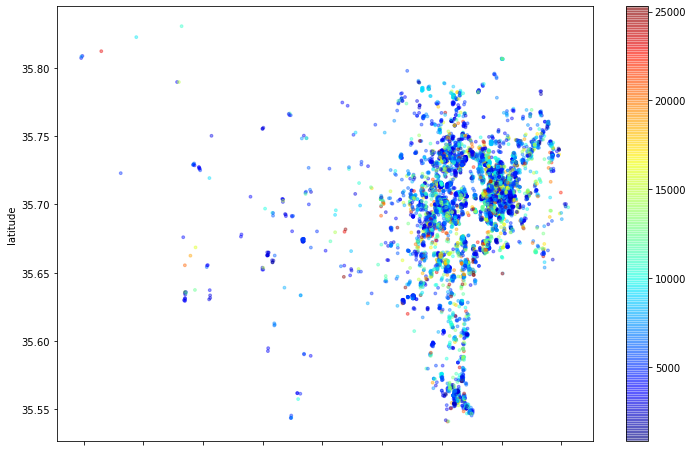

In [92]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Nota-se que a maioria dos alugueis estão com pontos azuis, o que repesenta valores mais inferiores, enquanto os valores mais avermelhados são valores mais altos.

## Imoveis no mapa

Para mostrar alguns imoveis dispostos na cidade vamos reduzir o dataset, pois se mostrarmos todos os imoveis ficaria um mapa extramamente poluido.

In [93]:
print('Dataset original: ', df.shape)
df_map = df.sample(frac=0.01, random_state=0)
print('Dataset para o plot: ', df_map.shape)

latitude = df_map.latitude.values
longitude = df_map.longitude.values
listings = df_map.name.values

tky = folium.Map(location=[35.60970864103211, 139.88057976483486],
                 zoom_start=11, )
for lat, lon, listing in zip(latitude, longitude, listings):
    folium.Marker(location=[float(lat), float(lon)]).add_to(tky)
tky


Dataset original:  (10353, 15)
Dataset para o plot:  (104, 15)


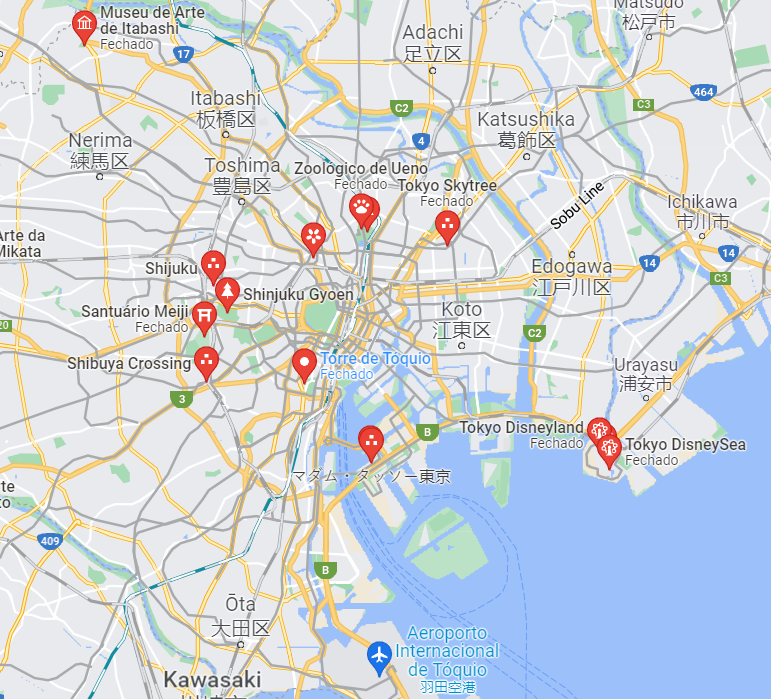

A partir dos mapas podemos ver que em média os imoveis estão dispostos com boas localizações para algumas das principais atrações de tokyo.

## **Qual é a média do mínimo de noites para aluguel ?**

In [94]:
# ver a média da coluna `minimum_nights``
print('Média de numero de noites mínima: {:.0f}'.format(df_clean.minimum_nights.mean()))

Média de numero de noites mínima: 1


## Curiosidade


Vamos gerar uma nuvem de palavras com as descrições de cada anuncio dentro do airbnb e perceber visualmente quais são as principais palavras elucidadas pelos proprietarios.

In [ ]:
df_words = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-10-28/data/listings.csv.gz")

neighborhood_overview	 = df_words.dropna(subset=['neighborhood_overview'], axis=0)['neighborhood_overview']

# concatenar as palavras
all_description = " ".join(s for s in neighborhood_overview	)
stopwords = set(STOPWORDS)
stopwords.update(['br'])
wordcloud = WordCloud(stopwords=stopwords, background_color=('black'), width=1600, height=800, contour_color='darkblue', colormap='coolwarm_r' ).generate(all_description)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);


Vemos que as palavras constam em ingles, com isso vou traduzir algumas para termos uma analise, sobre as qualidades ditas pelos proprietarios 

* Convenience store - Loja de conveniência
* National museum - Museu Nacional
* Minutes walk - Minutos a pé
* Cherry blossom - Flor de cerejeira
* Tokyo metro - Metro de Tokyo
* Tokyo station - Estação Tokyo
* Easy acess - Acessos Fáceis
* Tokyo skytree - Famosa torre de tokyo
* Sensoji temple - Templo budista japonês antigo

Pela descrição do imovel pelos prietarios, vemos que a maioria deles se concetram em lugares ótimos, perto de supermecados, pontos turísticos, linhas de metrô, e parques abertos.


# Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis que dificultam uma análise precisa do funcionamento do Airbnb em Tokyo. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, nota-se tambem que ainda é possivel alugar regiões mais caras por valores menores que média, alem disso, nota-se que a media de noites minimas para se alugar um imovel no Japão é de uma noite a um valor médio de ¥8395.38.

Ressalta-se tambem que os tipos de imoveis mais alugados são:
* Entire home/apartamento com 66.24% 
* Private room com 26.01%
* Hotel room 4.04
* Shared room 3.69%


